## O algoritmo Naive Bayes

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('credit_data.csv')
df.shape

(2000, 5)

In [3]:
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [4]:
# Para ML é importante lidar(apagar/completar) os dados NaN para que não haja erros
df.dropna(inplace=True)

In [5]:
# Foram apagados 3 registros que tinham valores NaN
df.shape

(1997, 5)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


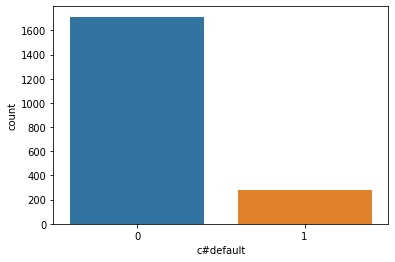

In [6]:
sns.countplot(df['c#default']);
# A classe 1 contem as pessoas que não pagaram o emprestimo
# Isso pode ser um problema para o treinamento do algoritmo
# A base de dados está desbalanceada

In [7]:
# Na divisão dos atributos de treino e teste temos que ter uma variavel
# Para armazenar os atributos previsores
# E outra variavel para armazenar a classe que será predita
# Aqui estou extraindo todos os registros os atributos das colunas 1 a 4 e pondo em X
# Colocamos o .values para converter o DataFrame em um array numpy
X = df.iloc[:, 1:4].values

In [8]:
X.shape

(1997, 3)

In [9]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [10]:
y = df.iloc[:, 4].values

In [11]:
y.shape

(1997,)

In [12]:
y

array([0, 0, 0, ..., 1, 0, 0])

## Base de treino e teste

In [13]:
# Aqui estou determinando 80% das bases para treino e 20% para teste
# O parametro stratify indica que o algoritmo deve retirar uma amostra estratificada
# Respeitando o percentual de bons pagadores e maus pagadores
# Estou pedindo para estratificar com base nos dados da coluna y
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [14]:
# 80% da base de dados
X_treino.shape, y_treino.shape

((1597, 3), (1597,))

In [15]:
# 20% da base de dados
X_teste.shape, y_teste.shape

((400, 3), (400,))

In [16]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [17]:
1714/len(df)
# percentual de bons pagadores

0.8582874311467201

In [18]:
283/len(df)
# percentual de maus pagadores

0.14171256885327993

In [19]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([1371,  226]))

In [20]:
1371/len(y_treino)
# perceba que o percentual de bons pagadores foi respeitado

0.8584846587351284

In [21]:
226/len(y_treino)
# perceba que o percentual de maus pagadores tbm foi respeitado

0.14151534126487164

## Classificação com algoritmo Naive Bayes 

In [22]:
modelo = GaussianNB()
modelo.fit(X_treino, y_treino)

GaussianNB(priors=None, var_smoothing=1e-09)

In [23]:
previsoes = modelo.predict(X_teste)
# Aqui estou usando os atributos X para testar meu modelo preditivo
# Estou prevendo se as pessoas serão boas ou más pagadoras com base no meu modelo
previsoes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [24]:
y_teste
# Aqui tenho os valores reais do dataset para bons e maus pagadores

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
# Comparando as previsões do modelo com os dados reais
# Perceba que o modelo atingiu uma precisão de 93.5%
accuracy_score(previsoes, y_teste)

0.9475

In [26]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[338,  16],
       [  5,  41]])

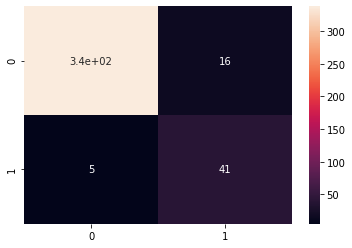

In [27]:
sns.heatmap(cm, annot=True);

In [28]:
# Percentual de acerto para pessoas que pagam o empréstimo
336 / (336 + 25)

0.9307479224376731

In [29]:
# Percentual de acerto para pessoas que não pagam o empréstimo
32 / (32 + 7)
# Perceba que o desbalanceamtno dos dados causou uma menor % aqui
# Isso porque existem menos dados de não pagadores
# Isso faz com que o algoritmo tenha dificuldade no treino desses dados

0.8205128205128205

In [30]:
# Perdas: 5000 por cliente mau pagador
# Cliente não pagadores: 1000
# 18 é o complemento de 82%, ou seja
# Serão os maus pagadores que conseguirão passar pelo algoritmo da forma que está
1000 * 18 / 100

180.0

In [31]:
# Da forma que o modelo está, estamos causando um prejuizo total de 900000
# Devemos usar tecnicas de Subamostragem/Sobreamostragem para melhorar o modelo
180 * 5000

900000

## Subamostragem e Sobreamostragem

In [32]:
# Subamostragem
from imblearn.under_sampling import TomekLinks

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [33]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_under, y_under, id_under = tl.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [34]:
X_under.shape, y_under.shape, id_under

((1897, 3), (1897,), array([   0,    1,    2, ..., 1994, 1995, 1996]))

In [35]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [36]:
np.unique(y_under, return_counts=True)

(array([0, 1]), array([1614,  283]))

In [37]:
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_under,
                                                                y_under,
                                                                test_size=0.2,
                                                                stratify=y_under)
X_treino_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [38]:
modelo_u = GaussianNB()
modelo_u.fit(X_treino_u, y_treino_u)
previsoes_u = modelo_u.predict(X_teste_u)
accuracy_score(previsoes_u, y_teste_u)

0.9315789473684211

In [39]:
cm_u = confusion_matrix(previsoes_u, y_teste_u)
cm_u

array([[320,  23],
       [  3,  34]])

In [40]:
315 / (315+26)

0.9237536656891495

In [41]:
31 / (31+8)

0.7948717948717948

In [42]:
# Sobreamostragem
from imblearn.over_sampling import SMOTE

In [43]:
smote = SMOTE(ratio='minority')
X_over, y_over = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [44]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [45]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [46]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([1714, 1714]))

In [47]:
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over,
                                                                y_over,
                                                                test_size=0.2,
                                                                stratify=y_over)

In [48]:
X_treino_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [49]:
modelo_o = GaussianNB()
modelo_o.fit(X_treino_o, y_treino_o)
previsoes_o = modelo_o.predict(X_teste_o)
accuracy_score(previsoes_o, y_teste_o)

0.9183673469387755

In [50]:
cm_o = confusion_matrix(previsoes_o, y_teste_o)
cm_o

array([[298,  11],
       [ 45, 332]])

In [51]:
305 / (305 + 13)

0.9591194968553459

In [52]:
330 / (330 + 38)

0.8967391304347826